In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
data = pd.read_csv('dataset/sales_data.csv')

In [93]:
data['Date'] = pd.to_datetime(data['Date'])

#### Steps
1. Calculate the total maintenance cost from all products in 2024
2. Get the total maintenance cost for each product in 2024
3. Calculate the percentage of each product maintenance cost in 2024

#### 1. Get the total maintenance cost for each product in 2024

1.1. Define a function that extract the data for a single year

In [94]:
def get_year(year, dataframe):

    # get data for a particular year
    one_year_data = dataframe[dataframe['Date'].dt.year == year]
    return one_year_data

1.2. Define a function that will extract data for a particular product

In [95]:
def get_specific_product_data(product_name, specific_data):

    # filter data for the provided product
    product_data = specific_data[specific_data['Product_Type'] == product_name]
    return product_data

Test defined functions

In [96]:
# get data from 2024
year_2024 = get_year(2024, data)

# get data for 'Pallet Truck' product
pallet_truck_data = get_specific_product_data('Pallet Truck', year_2024)

# print result data
pallet_truck_data


,Date,Region,Product_Type,Units_Sold,Client_Type,Sales_Channel,Service_Contract,Customer_Satisfaction,Revenue,Maintenance_Cost
1755,2024-01-01,Cluj,Pallet Truck,4,Corporate,Direct,Yes,10,19619.01,902.79
1758,2024-01-02,Iași,Pallet Truck,3,Corporate,Direct,No,8,17357.36,1249.79
1760,2024-01-02,Cluj,Pallet Truck,5,SME,Direct,No,10,23316.71,1666.34
1762,2024-01-02,Cluj,Pallet Truck,3,Corporate,Direct,No,9,14529.41,970.49
1767,2024-01-03,Iași,Pallet Truck,5,Corporate,Direct,Yes,10,27709.89,1351.88
...,...,...,...,...,...,...,...,...,...,...
3477,2024-12-26,Constanța,Pallet Truck,3,SME,Direct,Yes,7,16000.74,1057.45
3478,2024-12-26,București,Pallet Truck,3,SME,Direct,No,10,15335.24,802.00
3486,2024-12-28,Timișoara,Pallet Truck,5,Corporate,Direct,Yes,8,27455.86,1971.41
3491,2024-12-29,Cluj,Pallet Truck,4,Corporate,Dealer,No,6,22372.67,1532.35


1.3. Define a function that will calculate total mainance cost for single product

In [97]:
def get_prod_total_maint_cost(product_name, year_data):

    # get product data
    product_data = get_specific_product_data(product_name, year_data)

    # calculate the sum of maintenance cost for a year
    total_maint_cost = np.sum(product_data['Maintenance_Cost'])

    return total_maint_cost

In [98]:
def get_column_values(dataframe, column):

    return dataframe[column].unique()

In [99]:
product_names = get_column_values(data, 'Product_Type')
product_names

array(['Pallet Truck', 'Order Picker', 'Electric Forklift', 'Reach Truck'],
      dtype=object)

1.4. Define a function that will calculate the total maintenance cost entire year

In [100]:
def get_total_year_maintenace_cost(year, dataframe):

    total_maintenace_cost = 0
    year_data = get_year(year, dataframe)
    
    total_maintenace_cost = np.sum(year_data['Maintenance_Cost'])

    return total_maintenace_cost

In [101]:
total_maintenance_cost_2024 = get_total_year_maintenace_cost(2024, data)

print(f'Total maintenance cost in 2024: {total_maintenance_cost_2024:.0f} EUR')

Total maintenance cost in 2024: 4515589 EUR


1.5. Get total maintenance cost for each individual product

In [102]:
def get_all_individual_maintaince_cost(year, dataframe):

    products_maintenance = []
    year_data = get_year(year, dataframe)

    product_names_list = get_column_values(dataframe, 'Product_Type')

    for product in product_names_list:

        prod_total_maint_cost = get_prod_total_maint_cost(product, year_data)
        products_maintenance.append(prod_total_maint_cost)

    return products_maintenance

In [103]:
all_prod_maintenance = get_all_individual_maintaince_cost(2024, data)
all_prod_maintenance

[410957.04000000004, 846509.64, 1884835.0699999998, 1373287.69]

1.6. Make a DataFrame containing all individual products with their maintance cost for 2024

In [104]:
products_maint_cost_2024_df = pd.DataFrame({
    'Product': get_column_values(data, 'Product_Type'),
    'Maintenance_cost': all_prod_maintenance
})

In [105]:
print('\nTotal maintenance cost in 2024:')
print(f'{total_maintenance_cost_2024:.0f} EUR')

print('\nIndividual products total maintenance cost in 2024:')
print(products_maint_cost_2024_df)


Total maintenance cost in 2024:
4515589 EUR

Individual products total maintenance cost in 2024:
             Product  Maintenance_cost
0       Pallet Truck         410957.04
1       Order Picker         846509.64
2  Electric Forklift        1884835.07
3        Reach Truck        1373287.69


#### 3. Calculate the percentage from the maintenance cost for each individual product

3.1. Define a function that will calculate the percentage for an individual product

In [106]:
def get_percentage(maintenance_cost, total_cost):

    percentage = (maintenance_cost / total_cost) * 100
    percentage = round(percentage, 1)

    return percentage

3.2. Get the percentage from each product total maintenance cost

In [107]:
def get_all_products_percentage():

    prod_percentage_list = []
    prod_maint_cost_list = products_maint_cost_2024_df['Maintenance_cost']

    for prod_maintenance in prod_maint_cost_list:

        # get the percentage for the current product
        prod_percentage_list.append(get_percentage(prod_maintenance, total_maintenance_cost_2024))

    return prod_percentage_list

In [108]:
total_maintenance_cost_2024

4515589.4399999995

In [111]:
prod_maintenance_percentage_list = get_all_products_percentage()

products_maint_cost_2024_df['Percentage'] = prod_maintenance_percentage_list

products_maint_cost_2024_df

,Product,Maintenance_cost,Percentage
0,Pallet Truck,410957.04,9.1
1,Order Picker,846509.64,18.7
2,Electric Forklift,1884835.07,41.7
3,Reach Truck,1373287.69,30.4


#### 4. Make a Pie Chart from the results

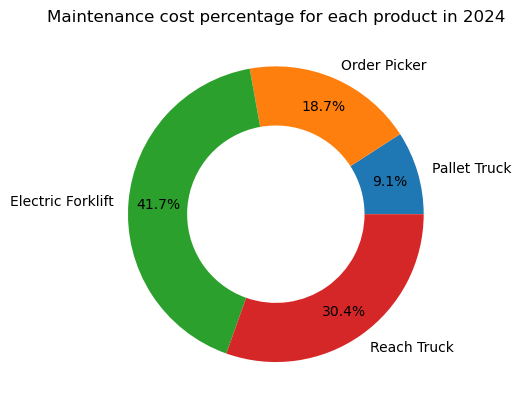

In [119]:
values = products_maint_cost_2024_df['Percentage']
labels = products_maint_cost_2024_df['Product']


# Create pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', wedgeprops={'width': 0.4}, pctdistance=0.8)

# Add title
plt.title('Maintenance cost percentage for each product in 2024')

# Display
plt.show()